## Employee Attrition

The purpose of this notebook is to determine the largest factors that contribute to employee attrtion, or the exit, and failure to replace an employee.

A logistic regression model will be used to determine the aforementioned factors

<b> Findings: </b>
  - A logistic regression model was created in order to predicts the attrition of employees. The model enjoyed an accuracy 87%, and an accuracy of 88% when presented with new data. This similarity in accuracy when faced with new data is indicative of a generalizable model.
  - Employees that work overtime and have to travel for business frequently are the largest predictors of an employee who will leave the firm. Additionally, being single is another significant predictor.
  - The model can most likely be impoved by cutting down on the total number of features

#### Variable classification
 - Age: Age
 - Attrition: Whether employee leaves the company
 - BusinessTravel: Frequency of business travel (No Travel, Travel Rarely, Travel Frequently)
 - DailyRate: Salary
 - Department: Employee's department
 - DistanceFromHome: Company's distance from home
 - Education: Education
 - EducationField: Employee's education background
 - EmployeeCount: Employee's headcount
 - EmployeeNumber: Employee's serial number
 - EnvironmentSatisfaction: How satisfied the emploee is with the environment
 - Gender: Employee's gender
 - HourlyRate: Salary
 - JobInvolvement: How involved the employee is with the job
 - JobLevel: Employee's job level
 - JobRole: Employee's job role
 - JobSatisfaction: How satisfied the employee is with the job
 - MaritalStatus: Employee's marital status
 - MonthlyIncome: Salary
 - MonthlyRate: Salary
 - NumCompaniesWorked: How many companies the employee has worked before
 - Over18: Whether the employee is over 18
 - OverTime: Whether the employee works overtime
 - PercentSalaryHike: By what percent does the salary increase between the last and this year
 - PerformanceRating: Employee's performance rating
 - RelationshipSatisfaction: How satisfied the emploee is with the relationship
 - StandardHours: Employee's standard working hours
 - StockOptionLevel: Employee's stock option level
 - TotalWorkingYears: How many years the employee has worked
 - TrainingTimesLastYear: How many training hours the employee received last year
 - WorkLifeBalance: Employee's work life balance
 - YearsAtCompany: How many years the employee has worked at this company
 - YearsInCurrentRole: How many years the employee has worked in current role
 - YearsSinceLastPromotion: How many years the employee has worked since last promotion
 - YearsWithCurrManager: How many years the employee has worked with current manager


### Import data and necessary libraries, packages

In [295]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from array import array
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,precision_score, recall_score, roc_auc_score, roc_curve


df = pd.read_csv('HR Employee Attrition.csv')

In [296]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [297]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [298]:
df.shape

(1470, 35)

### Data wrangling

In [299]:
## Turn attrtion variable into a boolean , ie Yes/no
df['Attrition'].replace('Yes',1, inplace=True)
df['Attrition'].replace('No',0, inplace=True)

In [300]:
## Get dummies for categorical data. 
categories = ['BusinessTravel','Department','Education','EducationField','Gender','MaritalStatus','OverTime', #'NumCompaniesWorked',
              'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','NumCompaniesWorked',
              'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
categorical = df[categories].astype('object')
categorical = pd.get_dummies(df[categories], drop_first = True)


In [301]:
categorical.shape

(1470, 32)

In [302]:
categorical.columns

Index(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'OverTime_Yes', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative'],
      dtype='object')

In [303]:
##Dropping coumns that will not be used, and creating a data frame for continuous data
drop = ['Attrition','Over18','EmployeeCount','StandardHours','EmployeeNumber']
continuous = df.drop(columns = categories)
continuous = continuous.drop(columns = drop)

continuous.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [304]:
## x is the collection of independent variables, y is the predictor, (attrtion)
x = pd.concat([categorical,continuous],axis=1)
y = df['Attrition']

In [305]:
## Scaling continuous data
scaler = StandardScaler()

scaler.fit(continuous)
scaled_array = scaler.transform(continuous) 

In [306]:
## Splitting data into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, \
        test_size = 0.3, random_state = 42) # reminder: random_state will ensure you get the same results

## Logistic regression model

In [307]:
from sklearn.linear_model import LogisticRegressionCV
import warnings 

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    clf = LogisticRegressionCV(cv=5, random_state=0).fit(x_train, y_train)

In [308]:
##Predicting training set and results
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = clf.predict(x_train)
print('Accuracy of training set:', '{:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision of training set: ','{:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall of training set:','{:.2f}'.format(recall_score(y_train, y_pred)))

Accuracy of training set: 0.87
Precision of training set:  0.83
Recall of training set: 0.30


In [309]:
## Predicting testing set and results
y_result = clf.predict(x_test)
print('Accuracy of test set:','{:.2f}'.format(accuracy_score(y_test, y_result)))
print('Precision of test set: ','{:.2f}'.format(precision_score(y_test, y_result)))
print('Recall of test set:','{:.2f}'.format(recall_score(y_test, y_result)))

Accuracy of test set: 0.88
Precision of test set:  0.72
Recall of test set: 0.21


In [310]:
##Confusion matrix from testing data set
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, preds)

array([[842,  11],
       [124,  52]])

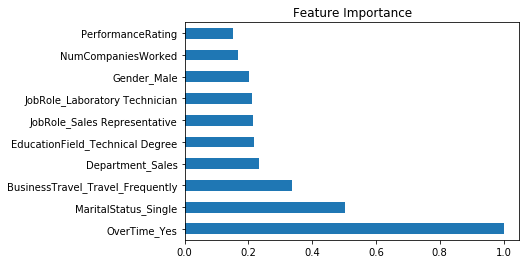

In [311]:
## Printing feature importance
importance = clf.coef_[0]
feat_importances = pd.Series(importance, index = x.columns)

feat_importances.nlargest(10).plot(kind='barh',title = 'Feature Importance')